In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

For a metric

$$ds^2 = - A(r)dt^2+\frac{dr^2}{A(r)}+r^2d\Omega^2,$$
(can extend things to most general metric later on)

the differential equation obeyed by photon orbits is

$$\left(\frac{dr}{d\phi}\right)^2 + r^2 A - r^4\frac{k^2}{h^2}=0,$$

or using the impact parameter $b$

$$\left(\frac{dr}{d\phi}\right)^2 + r^2 A - \frac{r^4}{b^2}=0.$$

We can differentiate this to find

$$\frac{d^2r}{d\phi^2}+rA+\frac{1}{2}r^2A'-2\frac{r^3}{b^2}=0.$$

So this is the equation we want to solve with some initial condition $r(\phi_0)=r_0$ and $dr/d\phi$ calculated from the first equation for different values of the impact parameter $b$.

In [ ]:
# Inputs 

def A(r):
    return 1 - 1 / r

def B(r):
    return 1 - 1 / r

def dAdr(r):
    return 1 / r**2

def dBdr(r):
    return 1 / r**2

r0 = 3/2 # initial radius
phi0 = 0 # initial angle
b = np.sqrt(27/4)-1e-10 # impact parameter
n_loops = 2
n_points_per_loop = 10000

In [ ]:
# Calculations

y0_plus = r0*np.array([1, +np.sqrt(B(r0)*(r0**2/(b**2*A(r0))-1))]) # y = [r, dr/dphi]
y0_minus = r0*np.array([1, -np.sqrt(B(r0)*(r0**2/(b**2*A(r0))-1))])

def dydphi(phi, y):
    r = y[0]
    drdphi = y[1]
    return np.array([drdphi,-r*B(r)-0.5*r**2*dBdr(r)+r**4*B(r)/(2*b**2*A(r))*(4/r+dBdr(r)/B(r)-dAdr(r)/A(r))])

def event_y0_less_than_1(t, y):
    return y[0] - 1

event_y0_less_than_1.terminal = True     # stop integration
event_y0_less_than_1.direction = -1      # only trigger when decreasing


sol_plus_fwd = solve_ivp(dydphi, (phi0,phi0+2*n_loops*np.pi), y0_plus, events=event_y0_less_than_1, dense_output=True, t_eval=np.linspace(phi0, phi0+2*n_loops*np.pi, n_points_per_loop*n_loops))
sol_plus_bwd = solve_ivp(dydphi, (phi0,phi0-2*n_loops*np.pi), y0_plus, events=event_y0_less_than_1, dense_output=True, t_eval=np.linspace(phi0, phi0-2*n_loops*np.pi, n_points_per_loop*n_loops))
sol_minus_fwd = solve_ivp(dydphi, (phi0,phi0+2*n_loops*np.pi), y0_minus, events=event_y0_less_than_1, dense_output=True, t_eval=np.linspace(phi0, phi0+2*n_loops*np.pi, n_points_per_loop*n_loops))
sol_minus_bwd = solve_ivp(dydphi, (phi0,phi0-2*n_loops*np.pi), y0_minus, events=event_y0_less_than_1, dense_output=True, t_eval=np.linspace(phi0, phi0-2*n_loops*np.pi, n_points_per_loop*n_loops))

y_sol_plus = np.concatenate((sol_plus_bwd.y, sol_plus_fwd.y), axis=1)
y_sol_minus = np.concatenate((sol_minus_bwd.y, sol_minus_fwd.y), axis=1)
phi_sol_plus = np.concatenate((sol_plus_bwd.t, sol_plus_fwd.t))
phi_sol_minus = np.concatenate((sol_minus_bwd.t, sol_minus_fwd.t))

r_sol_plus = y_sol_plus[0]
r_sol_minus = y_sol_minus[0]
# Giving r and phi in both directions from the initial point

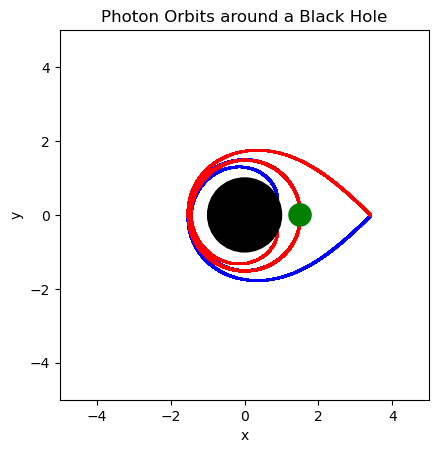

In [11]:
plt.scatter(r_sol_plus*np.cos(phi_sol_plus), r_sol_plus*np.sin(phi_sol_plus), color='blue',s=1)
plt.scatter(r_sol_minus*np.cos(phi_sol_minus), r_sol_minus*np.sin(phi_sol_minus), color='red',s=1)
black_hole = plt.Circle((0, 0), 1, color='black')
initial_point = plt.Circle((r0, 0), 0.3, color='green')
ax = plt.gca()
ax.add_artist(initial_point)
ax.add_artist(black_hole)
ax.set_aspect('equal', adjustable='box')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Photon Orbits around a Black Hole')
plt.show()

In [6]:
from black_hole_shadows.orbits import calc_photon_orbit

In [10]:
(r_sol_plus,r_sol_minus,phi_sol_plus,phi_sol_minus) = calc_photon_orbit(A, B, dAdr, dBdr, r0, phi0, b, n_loops, n_points_per_loop)

In [9]:
r_sol_plus

array([1.5       , 1.5       , 1.49999999, ..., 3.40116122, 3.40330893,
       3.40546006], shape=(39229,))